In [1]:
# exécutez cette cellule pour pouvoir effectuer les affichages ci-dessous
def affiche(N,T):
    s = N + ' = ['
    for x in T:
        s += '{:.2e}, '.format(x)
    s = s[:-2] + ']'
    print(s)

# 1SPE CHIM 3 - Evolution d'un système chimique

 Le programme suivant permet de tracer l'évolution des quantités de réactifs et de produits en fonction de l'avancement de la réaction dans le cas d'une transformation chimique (supposée totale) et modélisée par la réaction d'équation :

>$\large  Cu^{2+} + 2~HO^{-} \longrightarrow Cu(OH)_{2}$

**Données :**
    
- L'ion cuivre(II) réagit avec l'ion hydroxyde pour former un précipité d'hydroxyde de cuivre (II).
    
- Seul l'ion cuivre(II) absorbe le rayonnement de longueur d'onde indiquée par le professeur ($\lambda = 700~nm$)
    
- Une réaction s'arrête lorsqu'un des réactifs n'est plus disponible, on parle alors de réactif limitant.
    
- L’avancement d’une réaction, noté `x` , est une grandeur exprimée en mole qui permet de rendre compte de l’évolution des quantités de matière des espèces au sein d’un système chimique au cours du temps.
    
- Tant que les réactifs n'ont pas été mis en contact `x = 0 mol`, la réaction n'a pas commencé!

## Protocole
    
- Le professeur vous attribuera un numéro de binome

| Binôme         | 0 | 9 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 |
|----------------|---|---|---|---|---|---|---|---|---|---|
| $V_1$(mL)      | 0 | 25| 25| 25| 25| 25| 25| 25| 25| 25| 
| $V_2$(mL)      | 0 | 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 |
| $V_{eau}$ (mL) | 2 | 8 | 7 | 6 | 5 | 4 | 3 | 2 | 1 | 0 |

- Dans un bécher, mélanger soigneusement $V_1 = 25 mL$ de solution de sulfate de cuivre de concentration $C_1 = 0,10 mol.L^{-1}$ avec le volume $V_2$ de solution d'hydroxyde de sodium de concentration $C_2 = 1,0 mol.L^{-1}$ et le volume $V_{eau}$ d'eau distillée indiqué pour votre groupe.
- Filtrer le tout sans ajouter d'eau distillée supplémentaire.
- Prélever un peu de filtrat dans une cuve de spectrophotométrie.

**Notations employées**
- $n_1$ quantité de matière en ions cuivre (II)
- $n_2$ quantité de matière en ions hydroxyde
- $n_3$ quantité de matière en hydroxyde de cuivre (II)
- $A_{ini}$ absorbance initiale correspondant à la solution n°9
- $_{ini}$ indice indiquant qu'il s'agit de la situation avant le mélange des réactifs
- $_f$ indice indiquant qu'il s'agit de la situation obtenue après la réaction des réactifs entre eux
- $_{th}$ indice indiquant qu'on travaille en théorie, c'est à dire que nos hypothèses sont vérifiées
- $_{exp}$ indice indiquant que ce sont les résultats réellement obtenus lors de l'expérience

## Observations (aspects qualitatif et quantitatif)
Réalisez le protocole et notez vos observations ci dessous

- On obbserve l'apparition d'un précipité d'hydroxyde bleu de cuivre(II).
- La solution initialement bleus se décolore.
- La décoloration n'est pas totale pour certains groupes car les ions cuivre (II) ne sont pas totalement consommés.

## Exploitation :
<div class="alert alert-block alert-info"> 
    
Pourquoi est-on obligé d'ajouter un peu d'eau distillée dans le mélange avant la filtration?
</div>    

On est obligé d'ajouter un peu d'eau distillée dans le mélange avant la filtration pour que les volumes de tous les groupes soient identiques.

<div class="alert alert-block alert-info"> 
    
Saisir les données expérimentales correspondant à tous les groupes.
</div>

In [2]:
import numpy as np

# Données expérimentales

# Volume initial de la solution de sulfate de cuivre en Litre
V1 = 0.025
# Concentration initiale de la solution de sulfate de cuivre en mol/l
C1 = 0.10
# Concentration initiale de la solution d'hydroxyde de sodium en mol/L
C2 = 1.0

# Volume de solution d'hydroxyde de sodium introduit en Litre
t_V2 = [0.0,1.0e-3,2.0e-3,3.0e-3,4.0e-3,5.0e-3,6.0e-3,7.0e-3,8.0e-3]

# Absorbance initiale
Ainitiale = 0.506

# Absorbance de chaque filtrat expérimental
t_A = [0.506,0.398, 0.280, 0.138, 0.020, 0.006, 0.004, 0.003, 0.004]

<div class="alert alert-block alert-info"> 
    
Déterminer les quantités de matière initiale `n1` d'ion cuivre(II) et `n2` d'ions hydroxyde pour chaque groupe.
</div>    

In [3]:
# quantités de matière initiale d'ion cuivre(II)
n1 = C1*V1

# quantités de matière initiale d'ions hydroxyde pour chaque groupe
t_n2 = []
for V2 in t_V2:
    n2 = C2*V2
    t_n2.append(n2)

# affichage    
print('n1 = {:.2e} mol'.format(n1))
affiche('t_n2(mol)',t_n2)

n1 = 2.50e-03 mol
t_n2(mol) = [0.00e+00, 1.00e-03, 2.00e-03, 3.00e-03, 4.00e-03, 5.00e-03, 6.00e-03, 7.00e-03, 8.00e-03]


<div class="alert alert-block alert-info"> 
    
A l'aide de la Loi de Beer Lambert, vérifier que la quantité d'ions $Cu^{2+}$ consommés, est donnée par la relation :
    
$$ x_{1f} = n_1 \times \big( 1 - \frac {A} {A_{ini}} \big) $$

et calculer `x1f`pour chaque groupe. 
</div>

In [4]:
t_x1f = []
for A in t_A:
    x1f = n1 *(1 - A / Ainitiale)
    t_x1f.append(x1f)
    
# affichage    
affiche('x1f(mol)',t_x1f)

x1f(mol) = [0.00e+00, 5.34e-04, 1.12e-03, 1.82e-03, 2.40e-03, 2.47e-03, 2.48e-03, 2.49e-03, 2.48e-03]


<div class="alert alert-block alert-info"> 
    
Déterminer, pour chaque groupe, la quantité de matière `n1f` en ions cuivre(II) restant dans le mélange à l'état final
</div>    

In [5]:
# quantité de matière (pour chaque groupe) en ions cuivre(II) restant dans le mélange à l'état final
t_n1f = []
for x1f in t_x1f:
    n1f = n1 - x1f
    t_n1f.append(n1f)
    
# affichage    
affiche('n1f(mol)',t_n1f)

n1f(mol) = [2.50e-03, 1.97e-03, 1.38e-03, 6.82e-04, 9.88e-05, 2.96e-05, 1.98e-05, 1.48e-05, 1.98e-05]


<div class="alert alert-block alert-info"> 
    
Déterminer la quantité de matière `n3f` hydroxyde de cuivre formé dans le mélange à l'état final
</div>    

In [6]:
# n3f = quantité de matière en Cu(OH)2 formé dans le mélange à l'état final
t_n3f = []
for x1f in t_x1f:
    n3f = x1f
    t_n3f.append(n3f)

# affichage    
affiche('n3f(mol)',t_n3f)

n3f(mol) = [0.00e+00, 5.34e-04, 1.12e-03, 1.82e-03, 2.40e-03, 2.47e-03, 2.48e-03, 2.49e-03, 2.48e-03]


## Affichage du graphique

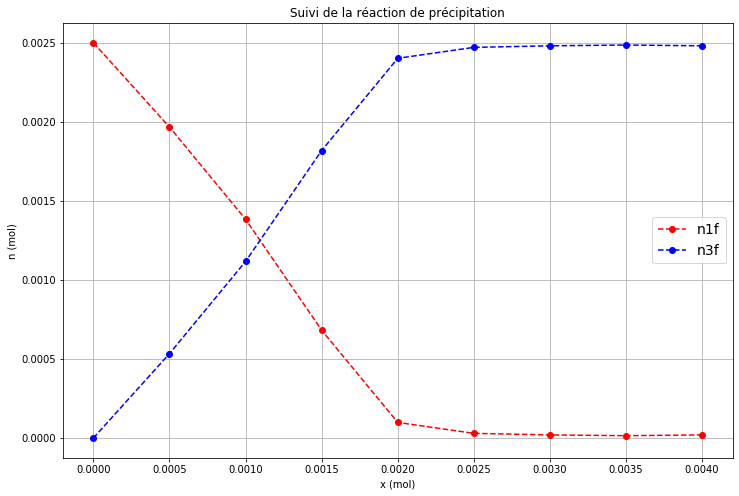

In [7]:
import matplotlib.pyplot as plt

# Calcul de l'avancement final théorique xf_th de la réaction réalisée par chaque binôme
t_xf_th = []
for n2 in t_n2:
    xf_th = n2 / 2  
    t_xf_th.append(xf_th)
#affichage du graphique    
plt.figure('Evolution du sytème',figsize=(12,8))
plt.title('Suivi de la réaction de précipitation')
plt.xlabel('x (mol)')           
plt.ylabel('n (mol)')
plt.plot(t_xf_th,t_n1f,'--ro', label='n1f')              
plt.plot(t_xf_th,t_n3f,'--bo', label='n3f')
plt.grid()                                
plt.legend(fontsize=14) 
plt.show()